In [11]:
import glob

import tensorflow as tf

from tensorflow.python.summary.summary_iterator import summary_iterator
from tensorflow.python.framework import tensor_util

from matplotlib import pyplot as plt

In [28]:
metrics = ['accuracy', 'loss', "I_XZ", "I_YZ"]

def event_file(path):
    files = glob.glob(f"{path}/*")
    return files[0]

def read_metrics(path):
    data = dict(zip(metrics,  [[] for x in range(len(metrics))]))
    
    for e in summary_iterator(event_file(path)):
        for v in e.summary.value:
            if v.tag in metrics:
                t = tensor_util.MakeNdarray(v.tensor)
                data[v.tag].append(float(t))
    return data


data = read_metrics("../artifacts-server/vdb-fashion_mnist--2019-11-21--11-16-05/logs/train");

In [29]:
def read_model_metrics(model_path):
    return dict(
        train=read_metrics(f"{model_path}/logs/train"),
        test=read_metrics(f"{model_path}/logs/test")
    )

data = read_model_metrics("../artifacts-server/vdb-fashion_mnist--2019-11-21--11-16-05")

In [85]:
fmnist_experiments = (
    ("oneshot",      "../artifacts-server/vdb-fashion_mnist--2019-11-21--11-16-05"),
    ("seq/d:1|e:5",  "../artifacts-server/vdb-fashion_mnist--2019-11-21--10-47-15"),
    ("seq/d:1|e:10", "../artifacts-server/vdb-fashion_mnist--2019-11-21--11-40-09"),
    ("seq/d:1|e:20", "../artifacts-server/vdb-fashion_mnist--2019-11-21--14-26-26"),
)

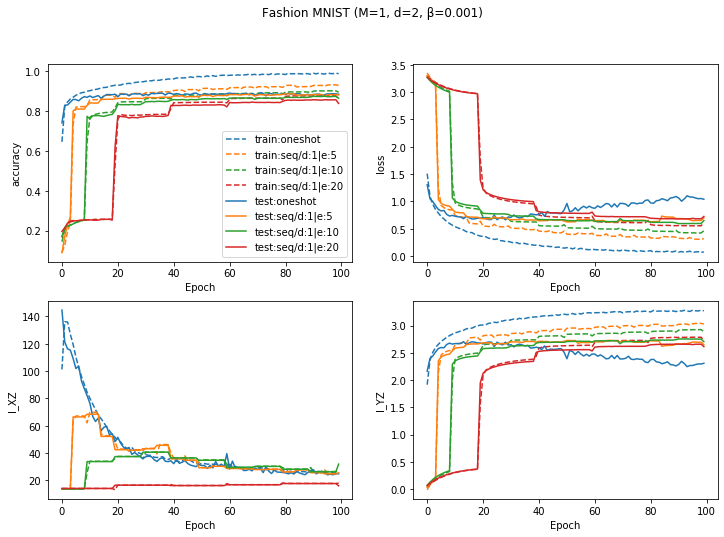

In [90]:
def plot_experiments(experiments, name, sets=['test']):
    cm = plt.get_cmap('tab10')
        
    experiment_metrics = dict()
    experiment_names = []
    total_experiments = len(experiments)
    
    for k, v in experiments:
        experiment_names.append(k)
        experiment_metrics[k] = read_model_metrics(v)

    plt.figure(figsize=(12, 8))
    
    for i, m in enumerate(metrics):
        plt.subplot(2, 2, i+1)
        for t in sets:
            for j, n in enumerate(experiment_names):
                color = cm.colors[j]
                plt.plot(experiment_metrics[n][t][m], "--" if t == "train" else "-", color=color, label=f"{t}:{n}")
        plt.ylabel(m)
        plt.xlabel("Epoch")
        if i == 0:
            plt.legend()
    plt.suptitle(name)

plot_experiments(fmnist_experiments, "Fashion MNIST (M=1, d=2, β=0.001)", sets=["train", "test"])